In [2]:
# Easter Egg Visualization
# Matt Spencer - DataBard
# www.databard.blog
# 4/1/2018
library(dplyr)
library(tidyr)
library(ggplot2)
library(grid)
library(gridExtra)

In [21]:
theme_Publication <- function(base_size=14, base_family="helvetica") {
      library(grid)
      library(ggthemes)
      (theme_foundation(base_size=base_size, base_family=base_family)
       + theme(plot.title = element_text(face = "bold",
                                         size = rel(1.2), hjust = 0.5),
               text = element_text(),
               panel.background = element_rect(colour = NA),
               plot.background = element_rect(colour = NA),
               panel.border = element_rect(colour = NA),
               axis.title = element_text(face = "bold",size = rel(1)),
               axis.title.y = element_text(angle=90,vjust =2),
               axis.title.x = element_text(vjust = -0.2),
               axis.text = element_text(), 
               axis.line = element_line(colour="black"),
               axis.ticks = element_line(),
               panel.grid.major = element_line(colour="#f0f0f0"),
               panel.grid.minor = element_blank(),
               plot.margin=unit(c(10,5,5,5),"mm"),
               strip.background=element_rect(colour="#f0f0f0",fill="#f0f0f0"),
               strip.text = element_text(face="bold")
          ))
      
}

scale_fill_Publication <- function(...){
      library(scales)
      discrete_scale("fill","Publication",manual_pal(values = c("#386cb0","#fdb462","#7fc97f","#ef3b2c","#662506","#a6cee3","#fb9a99","#984ea3","#ffff33")), ...)

}

scale_colour_Publication <- function(...){
      library(scales)
      discrete_scale("colour","Publication",manual_pal(values = c("#386cb0","#fdb462","#7fc97f","#ef3b2c","#662506","#a6cee3","#fb9a99","#984ea3","#ffff33")), ...)

}

# Function to generate the copyright for any plot
# Useage:
# g <- ggplot(...) + ...
# add.copyright(g)
# add.copyright(g, 0.5, 1/20)
add.copyright <- function(plot, fontsize=1, rel.height=1/20) {
    cp <- textGrob(paste("\uA9 Matt Spencer ", format(Sys.time(), "%Y"), ", databard.blog", sep=''),
             gp=gpar(fontfamily = "Verdana", cex=fontsize) ,
             x=unit(1, "npc"), hjust = 1) #, y=unit(0, "npc"), vjust = 0)
    
    cp.h <- round(rel.height*100)
    plot.h <- 100-cp.h
    lay <- matrix(c(rep(1,plot.h), rep(2,cp.h)))
    
    return(grid.arrange(plot, cp, layout_matrix = lay))
}


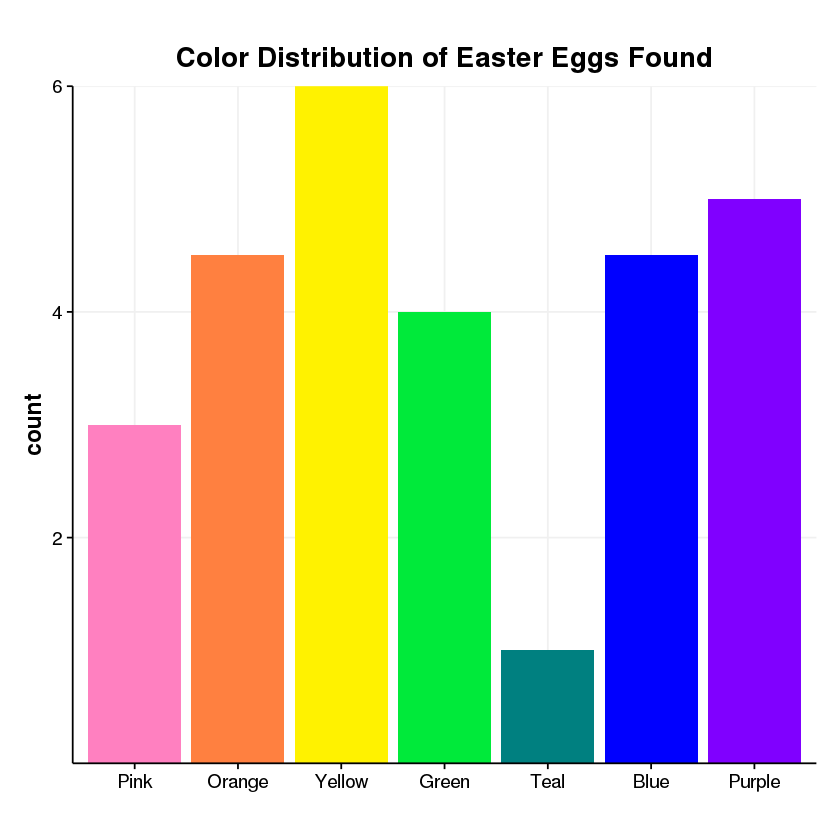

In [41]:
colors <- c("Pink", "Orange", "Yellow", "Green", "Teal", "Blue", "Purple")
eggs <- c(3, 4.5, 6, 4, 1, 4.5, 5)
data <- data.frame(color = factor(colors, levels = colors), 
                   count = eggs)

egg.colors <- c(rgb(255, 128, 192, max = 255), rgb(255, 128, 64, max = 255),
                rgb(255, 242, 0, max = 255), rgb(0, 234, 58, max = 255),
                rgb(0, 128, 128, max = 255), rgb(0, 0, 255, max = 255), 
                rgb(128, 0, 255, max = 255))

g <- ggplot(data, aes(x = color, y = count, fill = color)) +
    geom_col() +
    scale_fill_manual(values = egg.colors) +
    scale_y_continuous(breaks = seq(2, 6, 2), minor_breaks = seq(1, 5, 2), expand = c(0, 0)) +
    ggtitle("Color Distribution of Easter Eggs Found") +
    labs(x = "") +
    guides(fill = F,
           axis.title.x = element_blank()) +
    theme_Publication()
g

#ggsave(file = "figures/easteregg_colors.jpeg", g, width = 5, height = 3, dpi = 300)